In [1]:
import sys,os

data_path = os.getcwd()

try:
    import localgraphclustering as lgc
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    import localgraphclustering as lgc

In [2]:
import time
import numpy as np

import matplotlib.pyplot as plt

# Load graph

In [3]:
# Read graph. This also supports gml format.
#g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')
g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')
# To get a quick look at the list of methods and attributes for the graph object 'g' you can type 'g.' + tab
# and scroll up or down.

/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:217: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



# Nodes embedding via fiedler vector

In [4]:
# Call the global spectral partitioning algorithm.
output_sp = lgc.fiedler(g)
print(output_sp)
output_sp = lgc.fiedler(g,normalize=False)
print(output_sp)

(array([[-0.00042053],
       [ 0.00342669],
       [-0.0006336 ],
       ...,
       [-0.00067973],
       [-0.00013837],
       [-0.00065656]]), array([1.32380632e-16, 1.25784929e-01]))
(array([[ 0.00409879],
       [-0.02398684],
       [ 0.0072242 ],
       ...,
       [ 0.00709655],
       [ 0.00057053],
       [ 0.00553227]]), array([4.92439161e-16, 1.25784929e-01]))


# Nodes embedding via PageRank vector

In [5]:
ref_node = [3215]
# L1-regularized PageRank solver.
output_acl = lgc.approximate_PageRank(g,ref_node)
print(output_acl)
output_acl = lgc.approximate_PageRank(g,ref_node,cpp = False)
print(output_acl)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg")
print(output_l1reg)
output_l1reg = lgc.approximate_PageRank(g,ref_node,method = "l1reg",cpp = False)
print(output_l1reg)
output_l1reg_rand = lgc.approximate_PageRank(g,ref_node,method = "l1reg-rand")
print(output_l1reg_rand)
output_weighted = lgc.approximate_PageRank_weighted(g,ref_node)
print(output_weighted) 
output_nibble = lgc.PageRank_nibble(g,ref_node)
print(output_nibble) 
output_nibble = lgc.PageRank_nibble(g,ref_node,cpp=False)
print(output_nibble) 

(array([3215, 1496, 4581, ..., 3590, 2574, 1736], dtype=uint32), array([3.37931666e-03, 3.10299222e-05, 5.36460835e-05, ...,
       1.51078322e-07, 1.50084578e-07, 1.50049014e-07]))
[1.09052229e-04 2.55015005e-03 4.59018251e-05 ... 0.00000000e+00
 2.15758562e-05 0.00000000e+00]
(array([   0,    1,    2, ..., 5151, 5152, 5155], dtype=uint32), array([8.39853326e-07, 5.18026637e-05, 1.38914488e-07, ...,
       1.69945089e-06, 8.26229535e-08, 9.54816201e-07]))
(array([   0,    1,    2, ..., 5151, 5152, 5155], dtype=uint32), array([8.39839254e-07, 5.18026944e-05, 1.38949547e-07, ...,
       1.69975425e-06, 8.27073826e-08, 9.54671536e-07]))
(array([   0,    1,    2, ..., 5151, 5152, 5155], dtype=uint32), array([8.39784261e-07, 5.18026427e-05, 1.38880174e-07, ...,
       1.69941304e-06, 8.25855527e-08, 9.54721078e-07]))
(array([3215, 1496, 4581, ..., 3590, 2574, 1736], dtype=uint32), array([2.63586699e-01, 4.25109935e-03, 4.02345626e-03, ...,
       1.51078322e-07, 1.50084578e-07, 1.50049014e

# Rounding algorithms

In [6]:
output_sc = lgc.sweep_cut(g,output_acl)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg,cpp=False)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg)
print(output_sc)
output_sc = lgc.sweep_cut(g,output_l1reg_rand)
print(output_sc)

[array([3215, 1496, 4581, ..., 1667, 5128, 3414], dtype=uint32), 0.36393266859654766]


/usr/local/lib/python3.7/site-packages/localgraphclustering/sweep_cut.py:79: UserWarning:

Input will be converted to a dense vector, set "cpp" to be True for better performance



[[3215, 2793, 945, 1972, 454, 1608, 767, 1399, 2991, 2397, 2786, 986, 1952, 4249, 1740, 236, 2865, 4749, 2830, 175, 1625, 5150, 4581, 2406, 1, 4493, 4460, 4920, 992, 4811, 4062, 226, 2803, 3661, 823, 4926, 2689, 4984, 3209, 932, 1929, 1535, 433, 3715, 1496, 1073, 3405, 2033, 1301, 1603, 1980, 170, 4467, 2918, 1865, 4505, 1236, 1044, 670, 1114, 1355, 3791, 3861, 3398, 2105, 2663, 4910, 4346, 4476, 334, 1647, 2638, 2065, 487, 2235, 1116, 3100, 4410, 964, 867, 916, 3892, 2804, 1307, 4649, 1311, 2906, 1194, 3308, 62, 4878, 1567, 2930, 411, 343, 3736, 1212, 3211, 5052, 262, 697, 1938, 2841, 4992, 1097, 725, 1793, 2120, 5144, 2597, 852, 1235, 4178, 2154, 3135, 2773, 2438, 1366, 3478, 1513, 3523, 159, 4384, 2835, 377, 3992, 4922, 2123, 2620, 2775, 4336, 4253, 577, 2330, 64, 542, 77, 4306, 452, 2413, 2750, 2532, 2389, 2678, 576, 2467, 1009, 4033, 1152, 2012, 1861, 3664, 1011, 995, 3869, 2430, 2993, 379, 3599, 2015, 2798, 607, 2585, 3511, 3324, 3310, 2147, 629, 3188, 3106, 3277, 2814, 1041, 501

# Spectral local graph partitioning methods

In [7]:
ref_node = [3215]

# Find a cluster using approximate PageRank.
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl",iterations=100000)
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="acl_weighted",iterations=100000)
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))
output_pr_clustering = lgc.spectral_clustering(g,ref_node,method="l1reg")
print(output_pr_clustering)
print(g.compute_conductance(output_pr_clustering[0],cpp=False))
output_pr_clustering_rand = lgc.spectral_clustering(g,ref_node,method="l1reg-rand")
print(output_pr_clustering_rand)
print(g.compute_conductance(output_pr_clustering_rand[0]))

[array([3215, 2793,  945, ..., 3220, 1886, 4981], dtype=uint32), 0.32491771995840435]
0.32491771995840435
[array([3215, 2793,  945, ..., 3220, 1886, 4981], dtype=uint32), 0.32491771995840435]
0.32491771995840435
[array([3215, 2793,  945, ..., 4088, 1522, 2256], dtype=uint32), 0.3339125957392032]
0.3339125957392032
[array([3215, 2793,  945, ..., 4088, 1522, 2256], dtype=uint32), 0.3339125957392032]
0.3339125957392032


# Flow-based local graph partitioning methods

In [8]:
ref_node = [3215]
output_crd = lgc.flow_clustering(g,ref_node,method="crd")
print(output_crd)

[array([2378,  594, 3632, ..., 5155, 3244, 3222], dtype=uint32), 0.3555393477884639]


In [9]:
G = lgc.GraphLocal(os.path.join(data_path,'datasets/minnesota.edgelist'),'edgelist',remove_whitespace=True)
ref_node = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]
output_mqi = lgc.flow_clustering(G,ref_node,method="mqi")
print(output_mqi)
print(G.compute_conductance(output_mqi[0],cpp=False))

[array([195, 192, 191, 188, 187, 180, 178, 177, 176, 171, 169, 164, 158,
       152, 151, 149, 145, 144, 143, 142, 141, 139, 132, 131, 130, 129,
       128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 102, 100,  95,
        94,  93,  92,  91,  90,  89,  88,  85,  84,  83,  82,  81,  80,
        79,  78,  77,  76,  75,  74,  73,  71,  70,  69,  68,  67,  65,
        64,  63,  62,  61,  60,  59, 254,  57, 253,  56,  55,  54,  53,
       249,  52, 248,  51, 247,  50, 246,  49, 245,  48, 244,  47,  46,
        45,  44,  43,  42,  41,  40,  39,  38,  37,  36, 232,  35, 231,
        34,  33,  32, 228,  31, 227,  30, 226,  29, 225,  28,  27, 223,
        26,  25,  24,  23, 219,  22,  21, 217,  20,  19, 215,  18,  17,
        16, 212,  15, 211,  14, 210,  13, 209,  12, 208,  11,  10,   9,
         8,   7,   6,   5,   4,   3,  99,   2,  98,   1,   0],
      dtype=uint32), 0.03664921465968586]
0.03664921465968586


/usr/local/lib/python3.7/site-packages/localgraphclustering/flow_clustering.py:48: UserWarning:

The weights of the graph will be discarded. Use "crd" or "mqi_weighted" if you want to keep them.



In [10]:
G = lgc.GraphLocal(os.path.join(data_path,'datasets/minnesota.edgelist'),'edgelist',remove_whitespace=True)
ref_node = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]
output_sl = lgc.flow_clustering(G,ref_node,method="sl")
print(output_sl)
print(G.compute_conductance(output_sl[0],cpp=False))

/usr/local/lib/python3.7/site-packages/localgraphclustering/flow_clustering.py:56: UserWarning:

The weights of the graph will be discarded. Use "crd" if you want to keep them.



[array([111, 194, 170, 116, 110, 113, 184, 167,   3,   0,   7,   5,   4,
         9,   2,   8,  13,   6,  14,   1,  17,  12,  18,  11,  20,  23,
        16,  33,  15,  21,  32,  31,  34,  10,  22,  45,  40,  19,  41,
        53,  42,  43,  54,  46,  59,  55,  60,  63,  61,  62,  56,  52,
        39,  71,  70,  73,  75,  74,  65,  77,  69,  79,  57,  78,  76,
        82,  80,  67,  88,  68,  91,  84,  81,  83,  90,  95,  93,  92,
       102, 105, 107, 103, 106, 109, 112, 104, 100,  51, 128,  94, 127,
       130, 131,  98, 139, 123, 141,  99, 114,  89, 144, 142, 155, 160,
       157, 151, 162, 174, 161, 166, 159, 164, 152, 172, 165, 175, 149,
       176, 173, 168, 178, 177, 179, 158, 126, 171, 169, 187, 185, 180,
       191, 209, 211, 208, 192, 210, 132, 215, 201, 221, 188, 217, 195,
       227, 226, 225, 228, 219, 232, 231, 244, 246, 245, 247, 248, 253,
       249, 254, 223, 274, 276, 275, 212, 279, 293, 290, 299, 273],
      dtype=uint32), 0.021479713603818614]
0.021479713603818614


# Example for multiclass label prediction

In [11]:
g = lgc.GraphLocal(os.path.join(data_path,'datasets/JohnsHopkins.graphml'),'graphml')

# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

output_mc=lgc.multiclass_label_prediction(g,labels=labels)

In [12]:
print(output_mc)

[[array([1.65064110e-05, 8.88336054e-02, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([7.97860659e-05, 2.53833052e-03, 1.80588834e-05, ...,
       0.00000000e+00, 1.62318754e-05, 0.00000000e+00]), array([1.55676035e-04, 1.95890294e-04, 0.00000000e+00, ...,
       0.00000000e+00, 1.74625187e-05, 1.65171319e-05])], [array([2236,    0, 3837, ..., 3889, 3911, 5156]), array([ 794,   76, 1844, ..., 3538, 1909, 5156]), array([ 476,  398, 3340, ..., 3341, 1744, 1781])], [2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0

# Densest subgraph 

In [13]:
#How to use densest subgraph method.
g = lgc.GraphLocal(os.path.join(data_path,'datasets/Erdos02-cc.edgelist'),'edgelist',' ')
lgc.densest_subgraph(g)

[3.025390625, array([   0,    2,    3, ..., 5519, 5524, 5533], dtype=uint32)]

# Network Community Profile

In [3]:
G = lgc.GraphLocal(os.path.join(data_path,"datasets/Erdos02-cc.edgelist"),file_type = "edgelist", separator = " ", header = False)
ncp_instance = lgc.NCPData(G)
ncp_instance.approxPageRank(ratio=0.1,nthreads=4)

There are  1  connected components in the graph
1 1 139 0.0007464885711669922
0 1 139 0.0010099411010742188
3 1 138 0.0007243156433105469
2 1 138 0.0007128715515136719
1 2 139 0.004717111587524414
3 2 138 0.003850221633911133
2 2 138 0.004759311676025391
0 2 139 0.006114959716796875
0 3 139 0.011007070541381836
1 3 139 0.010376691818237305
3 3 138 0.008841514587402344
2 3 138 0.009682416915893555
1 4 139 0.026665449142456055
2 4 138 0.02616596221923828
0 4 139 0.027287006378173828
3 4 138 0.025546550750732422
1 5 139 0.028592586517333984
2 5 138 0.028048992156982422
0 5 139 0.029407262802124023
3 5 138 0.027675151824951172
1 6 139 0.0300443172454834
2 6 138 0.0295257568359375
0 6 139 0.031037330627441406
3 6 138 0.029554367065429688
1 7 139 0.03142285346984863
2 7 138 0.030895471572875977
0 7 139 0.03268790245056152
1 8 139 0.03280353546142578
2 8 138 0.03238940238952637
3 7 138 0.0314784049987793
0 8 139 0.034998178482055664
1 9 139 0.03417181968688965
3 8 138 0.033351898193359375
2 9

0 72 139 0.1478114128112793
1 69 139 0.14747095108032227
2 76 138 0.14766836166381836
3 69 138 0.14710092544555664
0 73 139 0.149322509765625
1 70 139 0.14888787269592285
2 77 138 0.14927101135253906
3 70 138 0.14857006072998047
0 74 139 0.15079951286315918
1 71 139 0.1503596305847168
2 78 138 0.1506061553955078
0 75 139 0.15215516090393066
3 71 138 0.15004849433898926
1 72 139 0.15177011489868164
2 79 138 0.15189290046691895
3 72 138 0.15142107009887695
1 73 139 0.15315580368041992
0 76 139 0.15355324745178223
2 80 138 0.15321755409240723
1 74 139 0.15450501441955566
3 73 138 0.15306329727172852
0 77 139 0.1552283763885498
2 81 138 0.15450692176818848
1 75 139 0.15585947036743164
3 74 138 0.15459299087524414
0 78 139 0.15700984001159668
1 76 139 0.1571211814880371
3 75 138 0.15609192848205566
2 82 138 0.15685462951660156
0 79 139 0.15851807594299316
1 77 139 0.15837574005126953
2 83 138 0.15843915939331055
3 76 138 0.1575756072998047
0 80 139 0.15996265411376953
1 78 139 0.15968799591

2 3 4 1.0100188255310059
0 3 5 1.0272579193115234
1 4 4 1.2317869663238525
3 4 4 1.2324824333190918
2 4 4 1.3063349723815918
0 4 5 1.3876855373382568
0 5 5 1.6927564144134521
out
0 1 5 0.3520805835723877
3 1 4 0.3517792224884033
2 1 4 0.37290215492248535
1 1 4 0.39009833335876465
2 2 4 0.6275887489318848
0 2 5 0.6669080257415771
3 2 4 0.6901998519897461
1 2 4 0.6973831653594971
2 3 4 0.9564905166625977
1 3 4 0.9928982257843018
0 3 5 1.0126211643218994
3 3 4 1.0632309913635254
2 4 4 1.2691147327423096
1 4 4 1.3270022869110107
0 4 5 1.330472469329834
3 4 4 1.378340244293213
0 5 5 1.6600925922393799
out
1 1 139 0.3282310962677002
3 1 138 0.35521507263183594
0 1 139 0.3620462417602539
2 1 138 0.38205981254577637
0 2 139 0.6273419857025146
1 2 139 0.6502110958099365
3 2 138 0.6612231731414795
2 2 138 0.6980278491973877
0 3 139 0.9288980960845947
1 3 139 0.9326555728912354
3 3 138 0.957763671875
2 3 138 0.9875717163085938
1 4 139 1.1894798278808594
0 4 139 1.221545696258545
3 4 138 1.2232060

0 69 139 20.950350522994995
3 70 138 21.184689044952393
2 72 138 21.220693826675415
1 70 139 21.247395038604736
0 70 139 21.274998664855957
3 71 138 21.510530471801758
2 73 138 21.533190488815308
1 71 139 21.561622381210327
0 71 139 21.616610527038574
3 72 138 21.844010829925537
2 74 138 21.870786428451538
1 72 139 21.879971027374268
0 72 139 21.917319536209106
2 75 138 22.142662525177002
3 73 138 22.189833402633667
1 73 139 22.21145272254944
0 73 139 22.278414011001587
2 76 138 22.466192722320557
3 74 138 22.50843906402588
1 74 139 22.53215193748474
0 74 139 22.623130559921265
2 77 138 22.728138208389282
1 75 139 22.84508776664734
3 75 138 22.846606969833374
0 75 139 22.984591722488403
2 78 138 23.040130376815796
3 76 138 23.179765939712524
1 76 139 23.19677758216858
2 79 138 23.32106614112854
0 76 139 23.344001531600952
1 77 139 23.531626224517822
3 77 138 23.535656213760376
2 80 138 23.61683440208435
0 77 139 23.70225214958191
1 78 139 23.814993381500244
3 78 138 23.8200421333313
2 

1 5 139 0.2937428951263428
1 6 139 0.3399026393890381
0 5 139 0.35660767555236816
3 5 138 0.3556041717529297
2 5 138 0.36452436447143555
1 7 139 0.4035320281982422
0 6 139 0.4135124683380127
2 6 138 0.43523097038269043
3 6 138 0.45386528968811035
1 8 139 0.47269749641418457
2 7 138 0.507042407989502
0 7 139 0.5307869911193848
3 7 138 0.5375795364379883
1 9 139 0.5632402896881104
2 8 138 0.5884537696838379
3 8 138 0.6293613910675049
0 8 139 0.6490211486816406
1 10 139 0.6412975788116455
2 9 138 0.6452822685241699
2 10 138 0.7031443119049072
3 9 138 0.7071282863616943
0 9 139 0.7331516742706299
1 11 139 0.7305266857147217
2 11 138 0.7573292255401611
3 10 138 0.7853305339813232
2 12 138 0.8106222152709961
0 10 139 0.8262875080108643
1 12 139 0.8178534507751465
3 11 138 0.8535952568054199
2 13 138 0.8609709739685059
1 13 139 0.8707525730133057
0 11 139 0.8818950653076172
0 12 139 0.8984684944152832
2 14 138 0.9174332618713379
1 14 139 0.9261329174041748
0 13 139 0.9365127086639404
3 12 138

1 77 139 4.923202991485596
0 80 139 4.962317943572998
3 78 138 4.9590160846710205
1 78 139 4.981133460998535
2 83 138 4.994065999984741
0 81 139 5.006857395172119
3 79 138 5.026303768157959
1 79 139 5.05432391166687
0 82 139 5.067232847213745
2 84 138 5.068734645843506
3 80 138 5.080975532531738
1 80 139 5.107015609741211
2 85 138 5.1075873374938965
0 83 139 5.125669002532959
3 81 138 5.144642114639282
2 86 138 5.162207365036011
1 81 139 5.171026945114136
0 84 139 5.188154697418213
3 82 138 5.202676296234131
2 87 138 5.2225635051727295
0 85 139 5.236737251281738
1 82 139 5.24578070640564
3 83 138 5.25603985786438
0 86 139 5.291869163513184
2 88 138 5.306332588195801
3 84 138 5.309046745300293
1 83 139 5.314545392990112
0 87 139 5.356605291366577
3 85 138 5.374149322509766
2 89 138 5.389491081237793
1 84 139 5.40299654006958
0 88 139 5.423150300979614
3 86 138 5.42907977104187
0 89 139 5.464559078216553
2 90 138 5.470262289047241
3 87 138 5.47789192199707
1 85 139 5.491905212402344
0 90

3 15 138 4.013542175292969
1 15 139 4.079625129699707
2 16 138 4.142765045166016
0 16 139 4.154556751251221
1 16 139 4.3250203132629395
0 17 139 4.335079908370972
3 16 138 4.356335639953613
2 17 138 4.372425079345703
1 17 139 4.5680530071258545
3 17 138 4.613631010055542
2 18 138 4.636622190475464
0 18 139 4.638223648071289
1 18 139 4.757350206375122
2 19 138 4.84002161026001
3 18 138 4.8704328536987305
0 19 139 4.957180738449097
1 19 139 5.040079355239868
2 20 138 5.051862955093384
3 19 138 5.1699347496032715
2 21 138 5.285945177078247
1 20 139 5.295605421066284
0 20 139 5.310969114303589
3 20 138 5.389692783355713
2 22 138 5.489148139953613
0 21 139 5.530916213989258
1 21 139 5.621864080429077
3 21 138 5.686129331588745
2 23 138 5.764355182647705
0 22 139 5.85244345664978
1 22 139 5.9460225105285645
3 22 138 5.968416929244995
2 24 138 6.013143301010132
0 23 139 6.165357828140259
1 23 139 6.164729118347168
3 23 138 6.230490446090698
2 25 138 6.332398176193237
0 24 139 6.39154624938964

3 89 138 23.69926953315735
2 93 138 23.732706546783447
1 92 139 23.8930561542511
0 87 139 23.947701454162598
3 90 138 23.976250886917114
2 94 138 24.04671335220337
0 88 139 24.16090703010559
1 93 139 24.192042112350464
3 91 138 24.27816939353943
2 95 138 24.332342624664307
0 89 139 24.362411975860596
3 92 138 24.43643569946289
1 94 139 24.511981964111328
0 90 139 24.60290789604187
2 96 138 24.6500141620636
3 93 138 24.75626015663147
1 95 139 24.775004863739014
0 91 139 24.93496608734131
2 97 138 24.973438024520874
1 96 139 25.002965688705444
3 94 138 25.031909942626953
0 92 139 25.163292407989502
1 97 139 25.258110284805298
2 98 138 25.29129433631897
3 95 138 25.297163724899292
0 93 139 25.420578241348267
1 98 139 25.490684509277344
3 96 138 25.532530784606934
2 99 138 25.569878101348877
0 94 139 25.645380973815918
1 99 139 25.72696614265442
3 97 138 25.812400817871094
2 100 138 25.836835622787476
0 95 139 25.901527166366577
1 100 139 25.93645191192627
3 98 138 26.0441792011261
1 101 1

2 15 138 0.6826627254486084
0 24 139 0.6834018230438232
0 25 139 0.6957132816314697
3 23 138 0.6943802833557129
2 16 138 0.700524091720581
3 24 138 0.7001116275787354
3 25 138 0.7108960151672363
2 17 138 0.712028980255127
0 26 139 0.7178115844726562
3 26 138 0.7210283279418945
2 18 138 0.7232718467712402
0 27 139 0.7295560836791992
2 19 138 0.7324507236480713
3 27 138 0.7348482608795166
2 20 138 0.7452051639556885
0 28 139 0.7509055137634277
0 29 139 0.7604694366455078
0 30 139 0.769094705581665
2 21 138 0.7691500186920166
2 22 138 0.7790184020996094
0 31 139 0.7805418968200684
3 28 138 0.7812178134918213
2 23 138 0.7847437858581543
0 32 139 0.7899162769317627
2 24 138 0.7958991527557373
0 33 139 0.8017632961273193
3 29 138 0.8010337352752686
0 34 139 0.8114664554595947
3 30 138 0.8154442310333252
2 25 138 0.8210422992706299
0 35 139 0.8222870826721191
0 36 139 0.8303201198577881
3 31 138 0.8380646705627441
2 26 138 0.8415086269378662
3 32 138 0.8502554893493652
2 27 138 0.852303028106

0 101 139 2.7403929233551025
0 102 139 2.7499802112579346
0 103 139 2.7751290798187256
0 104 139 2.7849817276000977
0 105 139 2.796794891357422
0 106 139 2.8079113960266113
0 107 139 2.817549467086792
0 108 139 2.829582452774048
0 109 139 2.8378989696502686
1 117 139 2.839686632156372
0 110 139 2.8477935791015625
0 111 139 2.8602778911590576
0 112 139 2.8801944255828857
0 113 139 2.8929929733276367
3 101 138 2.9000518321990967
0 114 139 2.9088902473449707
3 102 138 2.9141480922698975
0 115 139 2.921072244644165
0 116 139 2.9338598251342773
3 103 138 2.936772584915161
0 117 139 2.950524091720581
3 104 138 2.9515607357025146
3 105 138 2.9668917655944824
0 118 139 2.9733710289001465
3 106 138 2.9775819778442383
0 119 139 2.9851253032684326
3 107 138 2.9919824600219727
0 120 139 2.998833656311035
3 108 138 3.0053508281707764
0 121 139 3.0131263732910156
3 109 138 3.020435094833374
3 110 138 3.03074049949646
0 122 139 3.0366640090942383
3 111 138 3.0415565967559814
3 112 138 3.0542798042297

In [4]:
ncp_instance.results[0]

{'input_isop': 13.0,
 'input_cond': 0.8666666666666667,
 'input_edgeseff': 10.0,
 'input_edgestrue': 10.0,
 'input_sizeeff': 5,
 'input_sizetrue': 5,
 'input_voleff': 75.0,
 'input_cut': 65.0,
 'input_voltrue': 75.0,
 'output_isop': 13.0,
 'output_cond': 0.8666666666666667,
 'output_edgeseff': 10.0,
 'output_edgestrue': 10.0,
 'output_sizeeff': 5,
 'output_sizetrue': 5,
 'output_voleff': 75.0,
 'output_cut': 65.0,
 'output_voltrue': 75.0,
 'input_set_type': 'neighborhood',
 'input_set_params': 5186,
 'methodfunc': <function localgraphclustering.ncp._evaluate_set(G, N)>,
 'time': 5.245208740234375e-06}

In [15]:
ncp_instance.crd(ratio=0.01,w=10,U=10,h=1000,nthreads=4)

In [16]:
ncp_instance.mqi(ratio=0.1,nthreads=4)

In [17]:
ncp_instance.l1reg(ratio=0.1,nthreads=4)

In [18]:
ncp_instance.l1reg_rand(ratio=0.1,nthreads=4)

## Plot NCP with CRD

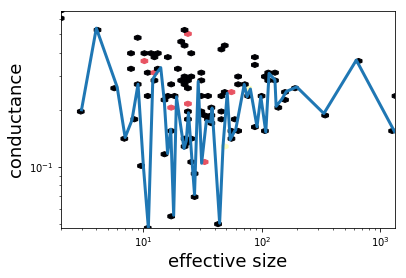

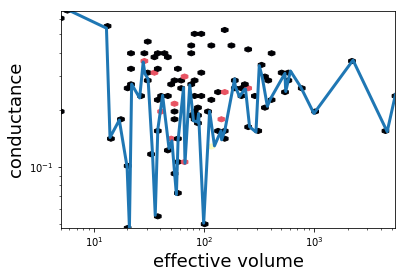

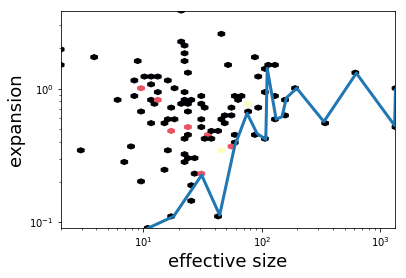

In [19]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "crd")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with MQI

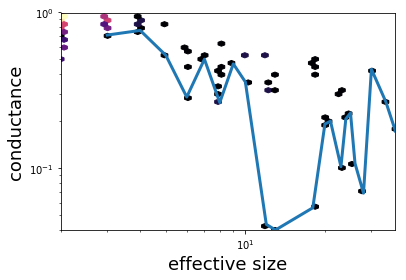

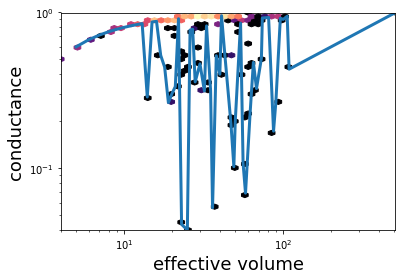

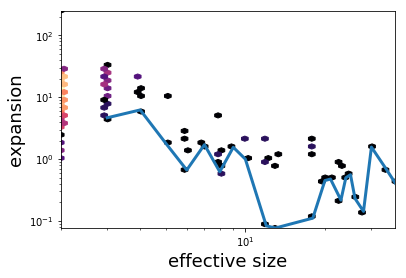

In [20]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "mqi")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with l1reg

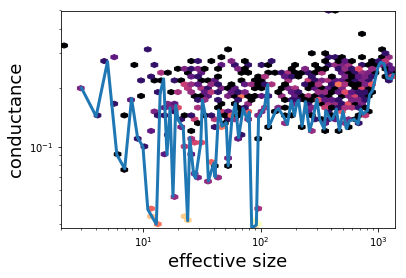

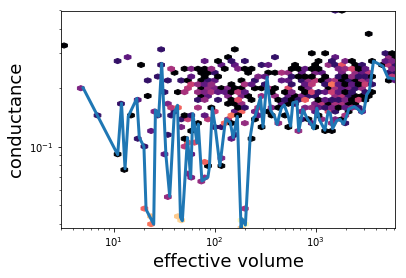

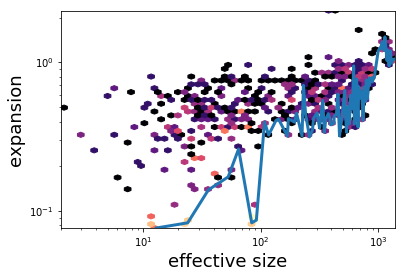

In [21]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "l1reg")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with acl

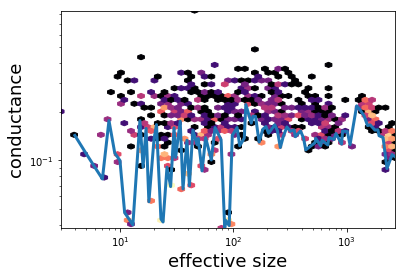

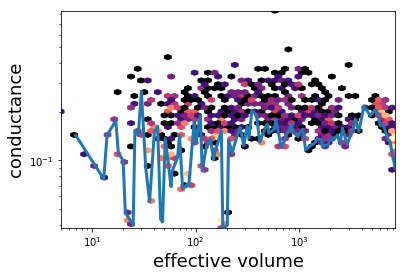

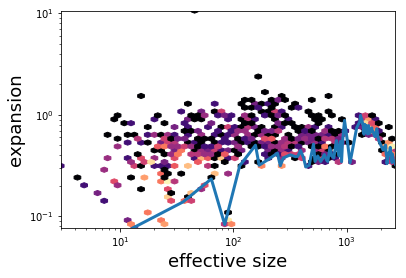

In [22]:
ncp_plots = lgc.NCPPlots(ncp_instance,method_name = "acl")
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Plot NCP with selected rows

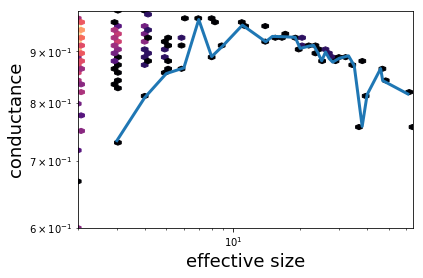

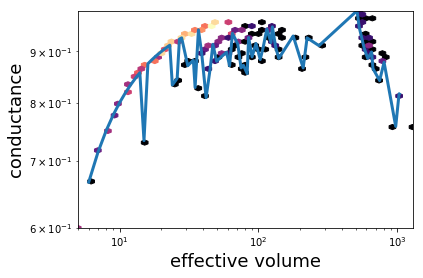

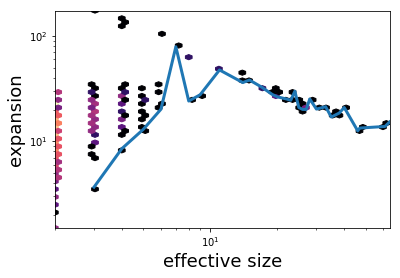

In [23]:
ncp_plots = lgc.NCPPlots(ncp_instance,selected_rows = range(500))
#plot conductance vs size
fig, ax, _ = ncp_plots.cond_by_size()
plt.show()
#plot conductance vs volume
fig, ax, _ = ncp_plots.cond_by_vol()
plt.show()
#plot isoperimetry vs size
fig, ax, _ = ncp_plots.isop_by_size()
plt.show()

## Check ncp results as a data frame

In [24]:
ncp_instance.as_data_frame()

,input_voltrue,input_cut,input_voleff,input_sizetrue,input_sizeeff,input_edgestrue,input_edgeseff,input_cond,input_isop,output_voltrue,...,output_sizeeff,output_edgestrue,output_edgeseff,output_cond,output_isop,methodfunc,input_set_type,input_set_params,time,method
0,75.0,65.0,75.0,5,5,10.0,10.0,0.866667,13.000000,75.0,...,5,10.0,10.0,0.866667,13.000000,<function _evaluate_set at 0x12fee30d0>,neighborhood,5186,3.099442e-06,neighborhoods
1,18.0,16.0,18.0,2,2,2.0,2.0,0.888889,8.000000,18.0,...,2,2.0,2.0,0.888889,8.000000,<function _evaluate_set at 0x12fee30d0>,neighborhood,523,1.192093e-06,neighborhoods
2,38.0,36.0,38.0,2,2,2.0,2.0,0.947368,18.000000,38.0,...,2,2.0,2.0,0.947368,18.000000,<function _evaluate_set at 0x12fee30d0>,neighborhood,5103,2.145767e-06,neighborhoods
3,23.0,21.0,23.0,2,2,2.0,2.0,0.913043,10.500000,23.0,...,2,2.0,2.0,0.913043,10.500000,<function _evaluate_set at 0x12fee30d0>,neighborhood,3321,2.145767e-06,neighborhoods
4,35.0,33.0,35.0,2,2,2.0,2.0,0.942857,16.500000,35.0,...,2,2.0,2.0,0.942857,16.500000,<function _evaluate_set at 0x12fee30d0>,neighborhood,3806,2.145767e-06,neighborhoods
5,7.0,5.0,7.0,2,2,2.0,2.0,0.714286,2.500000,7.0,...,2,2.0,2.0,0.714286,2.500000,<function _evaluate_set at 0x12fee30d0>,neighborhood,2796,9.536743e-07,neighborhoods
6,18.0,16.0,18.0,2,2,2.0,2.0,0.888889,8.000000,18.0,...,2,2.0,2.0,0.888889,8.000000,<function _evaluate_set at 0x12fee30d0>,neighborhood,4974,9.536743e-07,neighborhoods
7,45.0,43.0,45.0,2,2,2.0,2.0,0.955556,21.500000,45.0,...,2,2.0,2.0,0.955556,21.500000,<function _evaluate_set at 0x12fee30d0>,neighborhood,4302,1.192093e-06,neighborhoods
8,34.0,32.0,34.0,2,2,2.0,2.0,0.941176,16.000000,34.0,...,2,2.0,2.0,0.941176,16.000000,<function _evaluate_set at 0x12fee30d0>,neighborhood,4103,2.145767e-06,neighborhoods
9,46.0,44.0,46.0,2,2,2.0,2.0,0.956522,22.000000,46.0,...,2,2.0,2.0,0.956522,22.000000,<function _evaluate_set at 0x12fee30d0>,neighborhood,2807,9.536743e-07,neighborhoods


In [25]:
help(ncp_instance)

Help on NCPData in module localgraphclustering.ncp object:

class NCPData(builtins.object)
 |  NCPData(graph, setfuncs=[], input_stats=True, do_largest_component=True, store_output_clusters=False)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, graph, setfuncs=[], input_stats=True, do_largest_component=True, store_output_clusters=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_fiedler(self)
 |  
 |  add_fiedler_mqi(self)
 |  
 |  add_localmin_samples(self, feature=None, strict=True, ratio=1.0, mindegree=5, neighborhoods=True, timeout=1000, nthreads=4, method=None, methodname=None)
 |  
 |  add_neighborhoods(self, **kwargs)
 |  
 |  add_random_neighborhood_samples(self, ratio=0.3, timeout=1000, nthreads=4, method=None, methodname=None)
 |  
 |  add_random_node_samples(self, ratio=0.3, timeout=1000, nthreads=4, method=None, methodname=None)
 |  
 |  add_set_samples(self, sets, nthreads=4, method=None, methodname=None, timeout=1000)
 |  
 

## Extract a specific NCP result

In [26]:
#Get the first ncp result corresponding to the first row of the data frame above
print(ncp_instance.output_set(0))

#Get the second result corresponding to the second row of the data frame above
print(ncp_instance.output_set(9))

([146, 357, 397, 424, 5186], None)
([210, 2807], None)


## Clustering metrics for vertex neighborhood

In [27]:
g = lgc.GraphLocal(os.path.join(data_path,'datasets/dolphins.smat'),separator = ' ')
help(lgc.triangleclusters)
cond,cut,vol,cc,t = lgc.triangleclusters(g)

Help on function triangleclusters in module localgraphclustering.triangleclusters:

triangleclusters(G)
    TRIANGLECLUSTERS Clustering metrics for clusters of vertex neighborhoods.
    This function studies clusters which are given by vertex neighborhoods.
    Let v be a vertex in a graph, then the cluster associated with v is just
    the set of all neighbors of v and v itself.  We return the clustering
    metrics associated with these clusters for all vertices in the graph.
    
    Parameters
    ----------
    
    G: GraphLocal
    
    Returns
    -------
    
    cond: Sequence[float]
        conductance of each cluster of a vertex neighborhood
    
    cut: Sequence[float]
        cut of each cluster
    
    vol: Sequence[float]
        volume of each cluster
    
    cc: Sequence[float]
        clustering coefficient of each vertex
    
    t: Sequence[float]
        number of triangles centered at each vertex



## Find extrema in a graph based on neighborhoods.

In [28]:
help(lgc.neighborhoodmin)
minverts, minvals = lgc.neighborhoodmin(g,cond,True)

Help on function neighborhoodmin in module localgraphclustering.neighborhoodmin:

neighborhoodmin(G, vals, strict)
    Find extrema in a graph based on neighborhoods.
    Parameters
    ----------
    G: GraphLocal
    vals: Sequence[float]
        features of neighborhoods used to compare against each other, i.e. conductance
    strict: bool
        If True, find a set of vertices where vals(i) < vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
        If False, find a set of vertices where vals(i) <= vals(j) for all neighbors N(j)
        i.e. local minima in the space of the graph
    Returns
    -------
    minverts: Sequence[int]
        the set of vertices
    minvals: Sequence[float]
        the set of min values

